In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import matplotlib.pyplot as plt 
import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train),(x_test , y_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

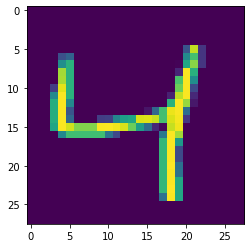

In [6]:
plt.imshow(x_train[2])
plt.show()
#plt.imshow(x_train[0] , cmap = plt.cm.binary)

In [11]:
print(x_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

In [13]:
X_train = tf.keras.utils.normalize(x_train , axis = 1)
X_test = tf.keras.utils.normalize(x_test , axis = 1)

In [14]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [15]:
print(y_train[0])

5


In [24]:
x_train.shape

(60000, 28, 28)

In [25]:
x_test.shape

(10000, 28, 28)

In [26]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train.shape,x_test.shape

((60000, 784), (10000, 784))

In [27]:
# X=X[:,1:]
# X.head()
# y=y[:,0:1]
# y.head()
# X_new=np.array(X)
# y_new=np.array(y)
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.1,random_state=7)
# X_train.shape,X_test.shape,y_train.shape,y_test.shape
from sklearn import svm
my_clf=svm.SVC(kernel='rbf')
my_clf.fit(x_train,y_train)
y_pred=my_clf.predict(x_test)
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_pred,y_test)
acc

0.979

In [32]:
import joblib
import cv2
import numpy as np #pip install numpy
import time
import pyscreenshot as ImageGrab
 
# model=joblib.load("model/digit_recognizer")
# images_folder="C:/Users/ASUS/Desktop/Untitled Folder/images_folder/img/"
images_folder="img/"
while True:
   img=ImageGrab.grab(bbox=(60,170,400,500))
   
   img.save(images_folder+"img.png")
   im = cv2.imread(images_folder+"img.png")
   im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
   im_gray  =cv2.GaussianBlur(im_gray, (15,15), 0)
   
   #Threshold the image
   ret, im_th = cv2.threshold(im_gray,100, 255, cv2.THRESH_BINARY)
   roi = cv2.resize(im_th, (28,28), interpolation  =cv2.INTER_AREA)
   
   rows,cols=roi.shape
   
   X = []
   
   ## Add pixel one by one into data array
   for i in range(rows):
       for j in range(cols):
           k = roi[i,j]
           if k>100:
               k=1
           else:
               k=0
           X.append(k)
   predictions  =my_clf.predict([X])
   print("Prediction:",predictions[0])
   cv2.putText(im, "Prediction is: "+str(predictions[0]), (20,20), 0, 0.8,(0,255,0),2,cv2.LINE_AA)
      
   cv2.startWindowThread()
   cv2.namedWindow("Result")
   cv2.imshow("Result",im)
   cv2.waitKey(10000)
   if cv2.waitKey(1)==13: #27 is the ascii value of esc, 13 is the ascii value of enter
     break
cv2.destroyAllWindows()

Prediction: 2
Prediction: 2
Prediction: 2
Prediction: 2
Prediction: 2
Prediction: 2
Prediction: 2
Prediction: 2
Prediction: 5
Prediction: 2


KeyboardInterrupt: 